# Aksara Jawa

## Install Dependencies

In [2]:
!pip install tensorflow==2.15.0

## Verify Installation

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import Image
import os

## Data Cleaning and Loading

### Remove Corrupted Images

In [5]:
def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        img.verify()  # Verify image is not corrupted
                except (IOError, SyntaxError):
                    print(f'Removing corrupted image: {file_path}')
                    os.remove(file_path)

# Run the function on your image directory
remove_corrupted_images('./data')

### Data Directory Configuration

In [6]:
base_dir = './data'
dirs = {char: os.path.join(base_dir, char) for char in ['ha', 'na', 'ca', 'ra', 'ka', 'da', 'ta', 'sa', 'wa', 'la', 'pa', 'dha', 'ja', 'ya', 'nya', 'ma', 'ga', 'ba', 'tha', 'nga']}

### Display Image Counts

In [7]:
for char, char_dir in dirs.items():
    print(f"Total training {char} images:", len(os.listdir(char_dir)))

Total training ha images: 204
Total training na images: 212
Total training ca images: 212
Total training ra images: 208
Total training ka images: 211
Total training da images: 211
Total training ta images: 208
Total training sa images: 211
Total training wa images: 212
Total training la images: 211
Total training pa images: 209
Total training dha images: 210
Total training ja images: 210
Total training ya images: 211
Total training nya images: 210
Total training ma images: 212
Total training ga images: 210
Total training ba images: 218
Total training tha images: 209
Total training nga images: 205


### Display Sample Files

In [8]:
for char, char_dir in dirs.items():
    files = os.listdir(char_dir)
    print(f"Sample {char} files:", files[:10])

Sample ha files: ['ha79.mine3.r5.png', 'ha0.theo.png', 'ha3.nando.rm5.png', 'ha1.mine.r5.png', '4693340161012711825_base64_5.png', '4694203474111376405_base64_5.png', '4693761962226194636_base64_5.png', 'ha161.pred.rm10.png', 'ha201.pred.rm5.png', 'ha81.mine.png']
Sample na files: ['na21.mine3.r10.png', '4695874552811358083_base64_8.png', 'na1.meki.r5.png', '4694221966812671068_base64_8.png', 'na202.pred.rm5.png', 'na53.mine2.r5.png', 'na2.mine.rm5.png', 'na80.mine3.rm5.png', '4694013554511662186_base64_8.png', '4694803355817399930_base64_8.png']
Sample ca files: ['4694125813125267530_base64_12.png', 'ca2.mine3.r5.png', 'ca54.mine2.rm10.png', 'ca5.nando.r10.png', 'ca22.mine3.png', 'ca22.mine3.rm5.png', 'ca81.mine3.png', 'ca2.theo.r10.png', '4693972276023610388_base64_12.png', '4696038101413220221_base64_12.png']
Sample ra files: ['ra103.mine.r10.png', 'ra204.pred.png', 'ra103.mine.rm5.png', 'ra103.mine.rm10.png', 'ra24.mine.png', 'ra24.mine.b.png', '4694023059412567494_base64_14.png', 

### Display Sample Images in Visual

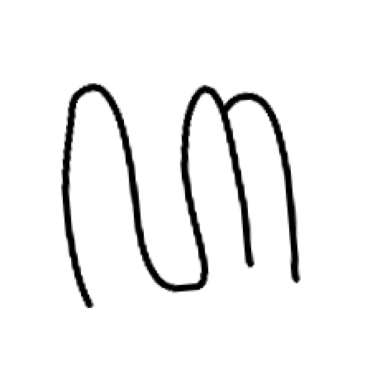

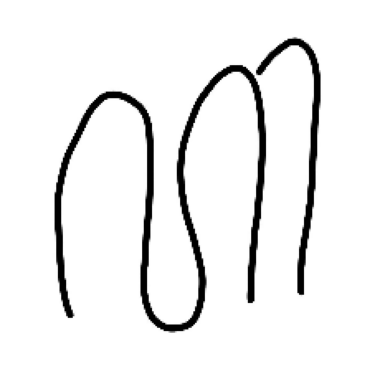

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_sample_images(char_dir, char_files, pic_index=2):
    sample_files = [os.path.join(char_dir, fname) for fname in char_files[pic_index-2:pic_index]]
    for img_path in sample_files:
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('Off')
        plt.show()

# Test
ha_files = os.listdir(dirs['ha'])
show_sample_images(dirs['ha'], ha_files)

## Data Preparation and Preprocessing

In [ ]:
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2
)

train_dataset = train_datagen.flow_from_directory(
    './data',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_dataset = train_datagen.flow_from_directory(
    './data',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)


Found 3363 images belonging to 20 classes.
Found 833 images belonging to 20 classes.


## Model Building

In [ ]:
from tensorflow.keras.regularizers import l2

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(20, activation='softmax')
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

## Training Model and Evaluate Model

In [ ]:
# Training Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# Evaluate Model
loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy:.2f}')

Found 4196 files belonging to 20 classes.
Using 3357 files for training.
Found 4196 files belonging to 20 classes.
Using 839 files for validation.
Epoch 1/100
105/105 [==============================] - 329s 3s/step - loss: 4.4275 - accuracy: 0.1379 - val_loss: 3.1381 - val_accuracy: 0.3373 - lr: 0.0010
Epoch 2/100
105/105 [==============================] - 279s 3s/step - loss: 3.3285 - accuracy: 0.3372 - val_loss: 2.6671 - val_accuracy: 0.4517 - lr: 0.0010
Epoch 3/100
105/105 [==============================] - 272s 3s/step - loss: 2.7327 - accuracy: 0.4781 - val_loss: 2.1278 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 4/100
105/105 [==============================] - 277s 3s/step - loss: 2.3950 - accuracy: 0.5562 - val_loss: 2.3506 - val_accuracy: 0.5685 - lr: 0.0010
Epoch 5/100
105/105 [==============================] - 354s 3s/step - loss: 2.0388 - accuracy: 0.6494 - val_loss: 1.8339 - val_accuracy: 0.6925 - lr: 0.0010
Epoch 6/100
105/105 [==============================] - 295s 3s/step 

## Plot Loss History

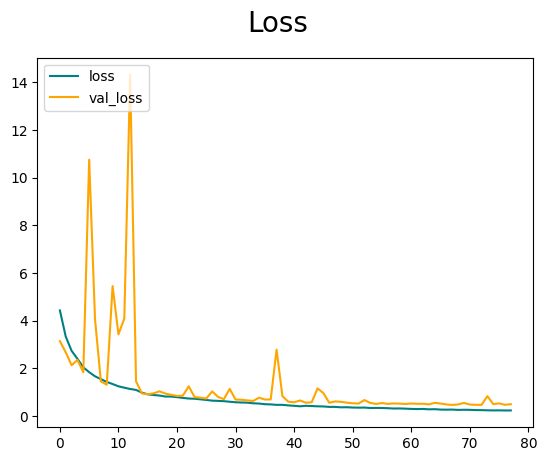

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Plot Accuracy History

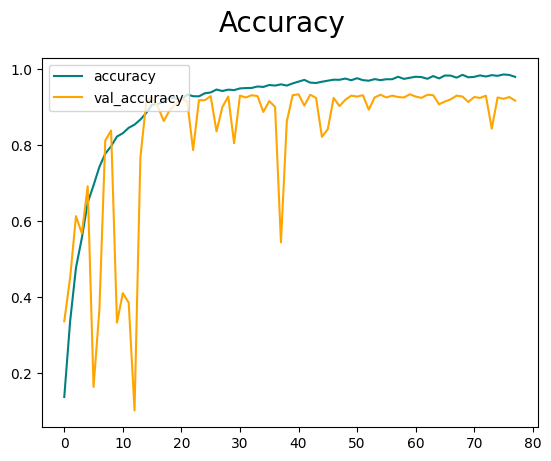

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Save Model

In [ ]:
model.save('model.keras')

NameError: name 'model' is not defined

## Convert Model to TFLite

In [ ]:
model = tf.keras.models.load_model('modelC.keras', compile=False)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp7pocvbfp\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp7pocvbfp\assets
